In [ ]:
!pip install yolo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.5/122.5 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 57.4 MB/s eta 0:00:00
  Attempting uninstall: keyring
    Found existing installation: keyring 23.5.0
    Uninstalling keyring-23.5.0:
      Successfully uninstalled keyring-23.5.0
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Succ

In [ ]:
pip install opencv-python

In [ ]:
import cv2

# Load YOLO
net = cv2.dnn.readNetFromDarknet("yolov3.cfg", "yolov3.weights")


layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Load image
image = cv2.imread("/content/depositphotos_61708349-stock-photo-collage-happy-people.jpg")
height, width, channels = image.shape

# Preprocess image
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Initialize variables
class_ids = []
confidences = []
boxes = []

# Process detections
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5 and class_id == 0:  # 0 corresponds to 'person' class in COCO dataset
            # Object detected as person with confidence > 0.5
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply non-max suppression
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Count people
num_people = len(indexes)

# Draw bounding boxes and count
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, 'Person', (x, y - 5), font, 1, (0, 255, 0), 1)

# Display result
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Print number of people detected
print("Number of people:", num_people)


error: OpenCV(4.8.0) /io/opencv/modules/dnn/src/darknet/darknet_importer.cpp:210: error: (-212:Parsing error) Failed to open NetParameter file: yolov3.cfg in function 'readNetFromDarknet'


In [ ]:
import cv2
import numpy as np
from google.colab import drive
from PIL import Image

# # Mount Google Drive (Optional)
# drive.mount('/content/drive')

# # Install OpenCV
# !pip install opencv-python

# Read the YOLO model
cfg_path = "/content/yolov3.cfg"
weights_path = "/content/yolov3_2000.weights"
net = cv2.dnn.readNetFromDarknet(cfg_path, weights_path)

# Function to count people in an image
def count_people(image_path):
    # Load image
    image = cv2.imread(image_path)
    height, width, channels = image.shape

    # Preprocess image
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(net.getUnconnectedOutLayersNames())

    # Initialize variables
    class_ids = []
    confidences = []
    boxes = []

    # Process detections
    for out in outs:
        for detection in out:
            scores = detection[5:]
            print(scores)
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.2 and class_id == 1:  # 0 corresponds to 'person' class in COCO dataset
                # Object detected as person with confidence > 0.5
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply non-max suppression
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Count people
    num_people = len(indexes)

    # Draw bounding boxes and count
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, 'Person', (x, y - 5), font, 1, (0, 255, 0), 1)

    # Display result
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    image.show()

    # Print number of people detected
    print("Number of people:", num_people)

# Example usage
image_path = "/content/gettyimages-200244581-003-612x612.jpg"
count_people(image_path)


Streaming output truncated to the last 5000 lines.
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]

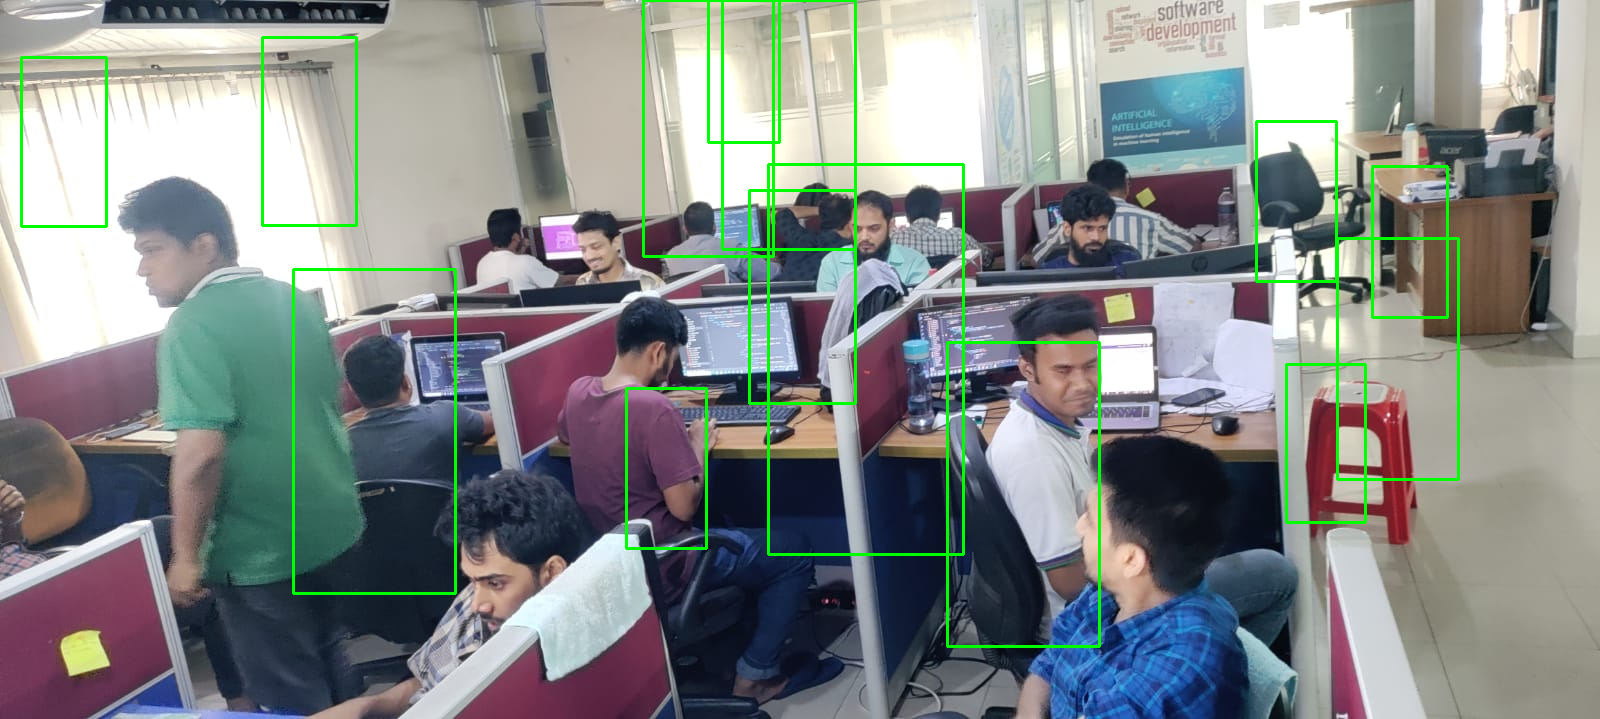

Number of people detected: 14


In [3]:
import cv2
from google.colab.patches import cv2_imshow

# Load the pre-trained pedestrian detection model
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Function to count people in an image
def count_people(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print("Error: Unable to load image.")
        return

    # Detect people in the image
    (rects, _) = hog.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.05)

    # Draw rectangles around the detected people
    for (x, y, w, h) in rects:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with rectangles
    cv2_imshow(image)

    # Count the number of people detected
    num_people = len(rects)
    print("Number of people detected:", num_people)

# Example usage
count_people("/content/WhatsApp Image 2024-06-09 at 3.06.11 PM.jpeg")
